# **GEOMETRICAL APPROACHES**

## **INTRODUCTION**

It is often the case that **data** is **encoded** as **numeric vectors** and hence is	naturally **embedded** in a **Euclidean space**, with a **dimension** equal to the **number of features**.

After the classical **PCA** that **fits a linear (flat) subspace** so that the total sum of squared distances of the data from the subspace (errors) is minimized, any 	**distance function** in this space **can be used** to provide it with a **geometric structure**, where ordinary intuition can be particularly powerful tools to reduce dimensionality.

The idea can be generalized by changing the flat space to obtain a possibly **nonlinear curved object** (a so-called **manifold**) that can be fitted to the data while trying to **minimize the deformations of distances** as much as possible.

A **geometric approach** to dimensionality reduction strives **to find fewer features** that **preserve** essential information in the data for a given problem (e.g., shape), which eventually translates into various relationships among the distances across all data points.

In a nutshell, the **geometric approach** is to reduce the dimensionality while **minimizing** some appropriate function (e.g., a **loss function**) that **quantifies discrepancies** between

> Distances between points in the given space.

>  Mapped points in the lower-dimensional space.


-------

#### **Examples**

**Example 1**

**PCA** can be interpreted geometrically as **fitting a linear (flat) subspace**
to the data so that the **error** defined as the total sum of squared distances of the data points from the subspace is minimized.

However, in general, the data may not be close to *flat*. A **curved object** may
fit the data better. In general, PCA will not be very successful in fitting a linear
subspace of the *correct* dimension to the data.

-----

**Example 2**

A synthetic 3D synthetic 3D dataset of 200 random points. The data actually lies along a spiral curve (not part of the data) so data points can be **parametrized** by the **distance from one end along the spiral** and so it is really
1D

In [ ]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from sklearn.decomposition import PCA

In [ ]:
n_points = 200
t = np.linspace(0, 10 * np.pi, n_points)
x = np.sin(t)
y = np.cos(t)
z = t

df = {
    'x': x + np.random.normal(0, 0.02, n_points),
    'y': y + np.random.normal(0, 0.02, n_points),
    'z': z + np.random.normal(0, 0.2, n_points)
}
points_3d = np.vstack([df["x"], df["y"], df["z"]]).T
pca = PCA(n_components=2)
points_2d = pca.fit_transform(points_3d)
projected_points = pca.inverse_transform(points_2d)

fig = px.scatter_3d(df, x='x', y='y', z='z')
line_trace = go.Scatter3d(x=x, y=y, z=z,
    mode='lines',
    line=dict(color='black', width=5),
    opacity=0.8
)
plane_trace = go.Mesh3d(
    x=projected_points[:, 0],
    y=projected_points[:, 1],
    z=projected_points[:, 2],
    color='rgba(50, 100, 100, 0.5)',
    opacity=0.5
)
projection_trace = go.Scatter3d(
    x=projected_points[:, 0],
    y=projected_points[:, 1],
    z=projected_points[:, 2],
    mode='markers',
    marker=dict(size=3, color='blue')
)
fig.add_trace(line_trace)
fig.add_trace(plane_trace)
fig.add_trace(projection_trace)
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))
fig.show()

It can be seen that the dimensionality of the data is not even 2. In fact, it is 1 if one agrees that **distances between data points** are the **distances along the spiral curve**. Under this interpretation, the data points on the spiral curve can be unrolled to a 1D line.

## **MANIFOLDS**

Mathematicians have developed a conceptual apparatus to address **curves**, already present in elementary Calculus, with the concepts of tangent lines and derivatives to **approximate curves** with **straight objects** such as tangent lines, **at least locally around a point**.

This property can be **generalized** to higher-dimensional situations where **tangent planes** or **spaces** must be used.

Such **smooth curved** objects are technically referred to as **smooth manifolds**, and the areas of mathematics studying them are called **differential geometry** and its generalization, **topology**.

In [ ]:
# Create a sphere
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

# Coordinates of the sphere
r = 1
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# Tangent plane at a point
theta_p = np.pi / 4
phi_p = np.pi / 4
x_p = r * np.sin(theta_p) * np.cos(phi_p)
y_p = r * np.sin(theta_p) * np.sin(phi_p)
z_p = r * np.cos(theta_p)
u = np.linspace(-0.5, 0.5, 10)
v = np.linspace(-0.5, 0.5, 10)
u, v = np.meshgrid(u, v)
tangent_x = x_p + u
tangent_y = y_p + v
tangent_z = z_p - (u * x_p + v * y_p) / z_p
distances = np.sqrt((tangent_x - x_p)**2 + (tangent_y - y_p)**2 + (tangent_z - z_p)**2)
distances_s = np.sqrt((x - x_p)**2 + (y - y_p)**2 + (z - z_p)**2)

# Visualization
fig = go.Figure()
sphere = go.Surface(x=x, y=y, z=z,
                    opacity=0.4, name='Smooth manifold example: Sphere',
                    colorscale='viridis', surfacecolor=distances_s)
tangent_plane = go.Surface(x=tangent_x, y=tangent_y, z=tangent_z,
                           colorscale='viridis', surfacecolor=distances,
                           opacity=0.5,
                           name='Plano Tangente')
point = go.Scatter3d(
    x=[x_p], y=[y_p], z=[z_p],
    mode='markers',
    marker=dict(size=6, color='red'))
fig.add_trace(sphere)
fig.add_trace(tangent_plane)
fig.add_trace(point)
fig.update_layout(
    title="Sphere",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z"
    )
)
fig.show()

### **Definiciones**

The critical concept is thus that of a **neighborhood**. For our purpose, the concept can simply be understood as a ball (without the boundary).

> **Definition:** Two subsets in two Euclidean spaces $\textbf{E}$,  $\textbf{E}^{'}$ are **smoothly homeomorphic** if and only if there exists a **smooth bijective mapping**
$$\phi: \textbf{E}\rightarrow \textbf{E}^{'}$$
with a smooth inverse between them that **preserves neighborhoods**, i.e., $\phi$ maps some neighborhood of every point $x \in  \textbf{E}$ onto a neighborhood of the point $\phi(y) \in \textbf{E}^{'}$ for all
$x, y \in \textbf{E}$.

> **Definition:** A $dD$ **smooth manifold** $\mathscr{M}$ is a subset of Euclidean space where **every point** $x$ has a neighborhood that is **smoothly homeomorphic** to some neighborhood in the $dD$ Euclidean space $\mathbb{R}^d$.
>
> In other words, $dD$ **smooth manifolds** are nice objects in Euclidean spaces in the sense that they have neighborhoods at every point that look like (i.e., are **smoothly deformable without tearing or breaking**) into flat neighborhoods of Euclidean spaces of some fixed Euclidean dimension $d$, despite the fact that they may be living in a higher-dimensional Euclidean space $\mathbb{R}^n$.

On a **smooth manifold**, one can use the notion of **length of a shortest path** between two points $x, y$ and speak of the **geodesic distance** from x to y, which is called a **Riemannian metric**. Manifolds endowed with such a concept are called **Riemannian manifolds**.

Thus, **all smooth manifolds are also Riemannian manifolds**. (Their technical definition refers to line **integrals on the manifold along paths**, but the conceptual idea is good enough here.)

In [ ]:
# Create spiral
n_points = 500
t = np.linspace(0, 10 * np.pi, n_points)
x = np.sin(t)
y = np.cos(t)
z = t
# Choose points
t1, t2 = np.pi, 8 * np.pi
idx1, idx2 = np.searchsorted(t, [t1, t2])
x1, y1, z1 = x[idx1], y[idx1], z[idx1]
x2, y2, z2 = x[idx2], y[idx2], z[idx2]
# Calculate Euclidean distance
dist_euclidiana = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
# Calculate Geodesic distance (arc length)
dx_dt = np.gradient(x, t)
dy_dt = np.gradient(y, t)
dz_dt = np.gradient(z, t)
arc_length = np.sqrt(dx_dt**2 + dy_dt**2 + dz_dt**2)
dist_geodesica = np.trapz(arc_length[idx1:idx2], t[idx1:idx2])
# Visualization
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='lines',
    line=dict(color='black', width=1)
))
fig.add_trace(go.Scatter3d(
    x=x[idx1:idx2+1], y=y[idx1:idx2+1], z=z[idx1:idx2+1],
    mode='lines',
    line=dict(color='red', width=7),
    name=f'Geodesic distance ({dist_geodesica:.2f})'
))
fig.add_trace(go.Scatter3d(
    x=[x1, x2], y=[y1, y2], z=[z1, z2],
    mode='lines',
    line=dict(color='green', width=7, dash='dash'),
    name=f'Euclidean distance ({dist_euclidiana:.2f})'
))
fig.add_trace(go.Scatter3d(
    x=[x1, x2], y=[y1, y2], z=[z1, z2],
    mode='markers',
    marker=dict(size=8, color='purple')
))
fig.update_layout(
    title="Difference between geodesic and Euclidean distance",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z"
    )
)
fig.show()

Indeed, one of the manifold learning algorithms (**ISOMAP**) tries to approximate this process: it **assumes** that **data lies on a Riemannian manifold** and that around a small Euclidean neighborhood the **geodesic distances** are very **well approximated** by the **Euclidean distances**, so in a small neighborhood (defined using **$k$-nearest neighbors** of the points for some $k$), the Euclidean distances are used. Otherwise a **shortest path algorithm** is used on the **$k$-nearest neighbor graph**.

The crucial point is that the calculus of manifolds shows how to extend the
existing mathematical techniques in Euclidean spaces **to curved spaces** that are non-Euclidean spaces, **but only look locally like them**. These matters are relevant to data science because even though data may appear  **high-dimensional** and **non-Euclidean**, one may be able to analyze them with concepts and algorithms available for Euclidean techniques, even in lower dimensions.

### **Dimension of the manifold**

If the data lies on a $dD$-manifold in a Euclidean space $\mathbb{R}^n$, the **dimensionality of the data** is the **dimension of the manifold**, $d$, even if $d < n$.

Thus, intrinsic dimension can be thought of as the **smallest number of independent parameters** needed to *describe* the data, if only locally.

# **MANIFOLD LEARNING METHODS**

The goal of geometric methods for Dimensionality Reduction is **to fit a manifold** of the **smallest possible dimension** to the given data, perhaps at the **cost of losing some precision** in passing to an approximation.

- How can such a manifold **be constructed**?

- Once that is done, how can it **be parametrized**?

Such techniques are also known
as **manifold learning methods**. They usually **directly provide a mapping** of the **unknown manifold** to a  **lower-dimensional Euclidean space**, and this mapping also serves as a parametrization.

The main manifold learning methods are:

- **Multi-Dimensional
Scaling (MDS)**

- **ISOmetric MAPping (ISOMAP)**

- **$t$-Stochastic Neighbor
Embedding (t-SNE)**

The basic philosophy of **MDS** and **ISOMAP** is  **to map the data points** onto a **lower-dimensional manifold** such that the **Euclidean distances** between pairs of
points **reflect the *dissimilarity*** between the original pairs of data points.

The dissimilarities are explicitly given for **MDS** (assuming they are coming from the same problem domain), while **ISOMAP** assumes they lie on some higher dimensional manifold and can be parametrized using the intrinsic geodesic distance on the manifold.

The **$t$-SNE algorithm** computes distributions defined using the
dissimilarity data and tries to match up these distributions in the reduction to the lower-dimensional space as closely as possible.

The output of a **manifold learning algorithm** is a dataset in lower dimension that can be used for visualization, classification, clustering, and other task.

# **Multi-Dimensional Scaling (MDS)**

**Multi-dimensional scaling (MDS)** originated in the subfield of **psychometrics** in psychology. The term was coined by Torgerson, who also proposed the first method for solving the problem. In psychometrics, a basic technique is to **assign quantitative coordinates** (**scaling**) to judgments of stimuli such as *object A is brighter than object B* or *A is twice as large as B*.

As observed by Torgerson, what seems to be a single-dimensional judgment, say *brighter* or *large*, may in fact be multi-dimensional, i.e., multiple factors may be involved in the qualitative judgment (hence, the M for multi-dimensional in MDS).

An issue here is the reference or zero
point in assessments such as *A is twice as large as B,* as opposed to *A is larger than B.* Torgerson calls these **comparative distances** and argues that after a displacement by a constant $c$, such comparative distances can be interpreted as absolute distances.

After this step is taken, the basic problem is whether, given some **absolute pairwise distances** between some objects (i.e., a distance matrix), one can **assign coordinates** so that these assessments are actually realized as distances between points in some Euclidean space.

Such a realization would help in
visualizing the set of objects. This
is a very good example of MDS in action for the data scientist.

Torgesons problem of **scaling** is also known as the **metric MDS problem** and
turns up in other fields such as marketing, sociology, biology, and data science.

When the specified **distance matrix actually arises from Euclidean distances**, a procedure based on **spectral methods** can be used to **find the mapping of objects to points in Euclidean space** and is known as **classical MDS**. The algorithm will succeed if distances are actually Euclidean, and then it is equivalent to the PCA algorithm. Surprisingly, the algorithm *works* (producing some output points) even if the given distances are not Euclidean, but clearly the distance between the produced points may not equal the desired input distance.

### **Classical MDS: Spectral Approach**

Given a dataset of size $n$ **to reduce** into a set $O$ of $n$ **mapped objects** $x_1,\ldots, x_n$, their
pairwise distances define a matrix $\textbf{D} = [d_{ij}]$, so that $d_{ii} = 0$ and $d_{ij} = d_{ji}$ for all $1 \leq i, j \leq n$, where each
$$x_i = (x_{i1},\ldots, x_{ik})^T$$
is a point in $pD$ space. For now, $p$
remains undetermined.

The unknowns $x_1,\ldots, x_n$ can be organized as a $k\times n$ matrix
$\textbf{X}$, as usual.

The **goal of MDS** is to find $x_i$s such that
$$||x_i-x_j||=d_{ij}$$

The **solution cannot be unique** since the displacements of the points in a solution by a common vector $c$ will also be a solution.

Thus, the mean of the $x_i$ should be zero, that is
$$\sum_{i=1}^n x_i =0$$
or equivalently,
$$\sum_{i=1}^n x_{ji} =0, \qquad  j=1,\ldots,p$$

To find the $x_i$, **MDS** proceeds as follows:

**1.** It computes the entry-wise squares of $D$, also known as the **Hadamard square**, i.e., the matrix $\textbf{A} = (a_{ij})$, where
$$a_{ij}=d_{ij}^2$$


**2.** It computes the matrix
$$\textbf{B} = -\frac{1}{2}\textbf{H}\textbf{A}\textbf{H}$$
where
$$\textbf{H} = \textbf{I} -\frac{1}{n}\textbf{1}\textbf{1}^T$$
is the **centering matrix**, $\textbf{I}$
 is the $n\times n$ identity matrix, and $\textbf{1} = [1, 1, . . . , 1]^T \in \mathbb{R}^n$ is a column of
1's.
Together, these steps transform the distance matrix to the **Gram matrix** of
the unknown points, i.e., if the desired condition  
$$||x_i-x_j||=d_{ij}$$
holds true and the mean of the $x_i$ is 0, then it will be true that
$$\textbf{X}^T\textbf{X}=\textbf{B}$$
i.e., the $(i, j )$-th entry
is not the distance between $x_i$, $x_j$, but their dot product
$x_i^Tx_j$.
The advantage of this is that $\textbf{X}$ can be further recovered by a spectral decomposition.


**3.** It finds the **spectral decomposition**
$$\textbf{B} = \textbf{V}\Lambda \textbf{V}^T$$
of $\textbf{B}$, where $\Lambda =\textbf{D}(\lambda_1, \ldots, \lambda_n)$
is the **diagonal matrix of eigenvalues** of $\textbf{B}$ and $\textbf{V} = [v_1, \ldots, v_n]$ is the **matrix of eigenvectors normalized** such that
$$v^T v= 1$$
and the
eigenvalues have been arranged in decreasing order
$$\lambda_1 \geq \lambda_2\geq \ldots \geq \lambda_n\geq 0$$
Let $p \leq n$ be the number of nonzero eigenvalues.


**4.** It finds
$$\textbf{B} = \textbf{V}_1\Lambda_1 \textbf{V}_1^T$$
where $\Lambda_1 = diag(\lambda_1, \ldots, \lambda_p)$ and $\textbf{V}_1 = [v_1, . . . , v_p]$


**5.** It returns $X$ as
$$\textbf{X} = \textbf{V}_1\Lambda_1^{\frac{1}{2}}$$
where $\Lambda_1^{\frac{1}{2}}=diag(\sqrt{\lambda_1}, \ldots, \sqrt{\lambda_p})$

In this procedure, the sign of the eigenvectors $v_i$ could be all flipped (corresponding to a reflection across the origin). Thus while centering **removes some indeterminacy** in the solution, reflections can still leave a choice of sign. However, this is not really an issue, as either choice will work

The algorithm above can be used on a given distance matrix $\textbf{D}$, even if it does not arise from Euclidean distances.

What will happen in this case is that the matrix in step 2 above will not necessarily be a **Gram matrix**.

However, if it is **positive semi-definite**, the algorithm would still “go through” producing the desired matrix $\textbf{X}$.

On the other hand, if $\textbf{B}$ is not positive semi-definite (this is equivalent to some eigenvalue being negative or complex),
- one approach is to make $\textbf{B}$ positive semi-definite by starting with a new distance matrix $\textbf{D}$, after adding the same constant $c$ to each entry $d_{ij}$ with $i\neq j$. This additive constant can always be found.
-A nother approach is to neglect the negative eigenvalues (and corresponding eigenvectors). In this case, **MDS**
produces some kind of approximate solution to the problem, i.e., it will not be the case that
$$||x_i-x_j||=d_{ij}$$
but hopefully so that
$$||x_i-x_j||\approx d_{ij}$$.

Another remark is that the dimension of the space for the points $x_i$ does not necessarily have to be the number of nonzero eigenvalues. Any number $k \leq p$ less than the number of nonzero eigenvalues will do. (This is analogous to choosing the top $k$ principal components in PCA).

### **Computational example: MDS**

In [ ]:
# Import function to calculate distance matrix
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [ ]:
# Set the original dataset
X = np.array([(1,1),
             (3, -1),
             (-3, -2),
             (-1,2)])
mean = X.mean(axis=0)

In [ ]:
X = np.array([(1,1),
             (1, -1),
             (-1, 1),
             (-1, -1)])
mean = X.mean(axis=0)

#### **Step 1**

In [ ]:
# Calculate distance matrix
D = cdist(X, X)
print(D)

[[0.         2.         2.         2.82842712]
 [2.         0.         2.82842712 2.        ]
 [2.         2.82842712 0.         2.        ]
 [2.82842712 2.         2.         0.        ]]


$a_{ij}=d_{ij}^2$


In [ ]:
# Calculate Hadamard square matrix
A = D**2
print(A)

[[0. 4. 4. 8.]
 [4. 0. 8. 4.]
 [4. 8. 0. 4.]
 [8. 4. 4. 0.]]


#### **Step 2**

$\textbf{H} = \textbf{I} -\frac{1}{n}\textbf{1}\textbf{1}^T$

In [ ]:
# Calcualte centering matrix
H =  np.identity(4) - 1/ 4 * np.ones((4, 1)) @ np.ones((1, 4))
print(H)

[[ 0.75 -0.25 -0.25 -0.25]
 [-0.25  0.75 -0.25 -0.25]
 [-0.25 -0.25  0.75 -0.25]
 [-0.25 -0.25 -0.25  0.75]]


$\textbf{B} = -\frac{1}{2}\textbf{H}\textbf{A}\textbf{H}$

In [ ]:
B = - 1/2 * H @ A @ H
print(B)

[[ 2.00000000e+00  3.33066907e-16  3.88578059e-16 -2.00000000e+00]
 [ 3.33066907e-16  2.00000000e+00 -2.00000000e+00  3.88578059e-16]
 [ 3.88578059e-16 -2.00000000e+00  2.00000000e+00  3.88578059e-16]
 [-2.00000000e+00  4.44089210e-16  4.44089210e-16  2.00000000e+00]]


$\textbf{X}^T\textbf{X}=\textbf{B}$

In [ ]:
print(X @ X.T)

[[ 2  0  0 -2]
 [ 0  2 -2  0]
 [ 0 -2  2  0]
 [-2  0  0  2]]


#### **Step 3**

$\textbf{B} = \textbf{V}\Lambda \textbf{V}^T$

In [ ]:
# Perform spectral decomposition
eigenvalues, eigenvectors = np.linalg.eig(B)
sorted_idx = np.argsort(eigenvalues)[::-1]  # Indices ordenados de mayor a menor
eigenvalues = eigenvalues[sorted_idx]  # Autovalores ordenados
eigenvectors = eigenvectors[:, sorted_idx]  # Reordenar autovectores

In [ ]:
print(eigenvalues.round(4))

[ 4.  4. -0. -0.]


In [ ]:
# Filtrate positive eigenvalues and their orthonormal eigenvectors
positive_mask = eigenvalues > 0 +1e-10
eigenvalues_positive = eigenvalues[positive_mask]
eigenvectors_positive = eigenvectors[:, positive_mask]

#### **Step 4**

$\Lambda_1$

In [ ]:
eigenvalues_matrix = np.diag(eigenvalues_positive)
print(eigenvalues_matrix)

[[4. 0.]
 [0. 4.]]


$\textbf{V}_1\Lambda_1 \textbf{V}_1^T$

In [ ]:
print(eigenvectors_positive @ eigenvalues_matrix @ eigenvectors_positive.T)

[[ 2.0002031   0.02015316 -0.02015316 -2.0002031 ]
 [ 0.02015316  1.9997969  -1.9997969  -0.02015316]
 [-0.02015316 -1.9997969   1.9997969   0.02015316]
 [-2.0002031  -0.02015316  0.02015316  2.0002031 ]]


$\textbf{B}$

In [ ]:
print(B)

[[ 2.00000000e+00  3.33066907e-16  3.88578059e-16 -2.00000000e+00]
 [ 3.33066907e-16  2.00000000e+00 -2.00000000e+00  3.88578059e-16]
 [ 3.88578059e-16 -2.00000000e+00  2.00000000e+00  3.88578059e-16]
 [-2.00000000e+00  4.44089210e-16  4.44089210e-16  2.00000000e+00]]


$\Lambda_1^{\frac{1}{2}}$

In [ ]:
eigenvalues_sqrt = np.sqrt(eigenvalues_matrix)
eigenvalues_sqrt

array([[2., 0.],
       [0., 2.]])

#### **Step 5**

$\textbf{X} = \textbf{V}_1\Lambda_1^{\frac{1}{2}}$

In [ ]:
X_new = eigenvectors_positive @ eigenvalues_sqrt
X_new.round(3)

array([[ 0.014, -1.414],
       [ 1.414, -0.   ],
       [-1.414, -0.   ],
       [-0.014,  1.414]])

In [ ]:
cdist(X_new, X_new).round(3)

array([[0.   , 1.99 , 2.01 , 2.829],
       [1.99 , 0.   , 2.828, 2.01 ],
       [2.01 , 2.828, 0.   , 1.99 ],
       [2.829, 2.01 , 1.99 , 0.   ]])

In [ ]:
cdist(X, X).round(3)

array([[0.   , 2.   , 2.   , 2.828],
       [2.   , 0.   , 2.828, 2.   ],
       [2.   , 2.828, 0.   , 2.   ],
       [2.828, 2.   , 2.   , 0.   ]])

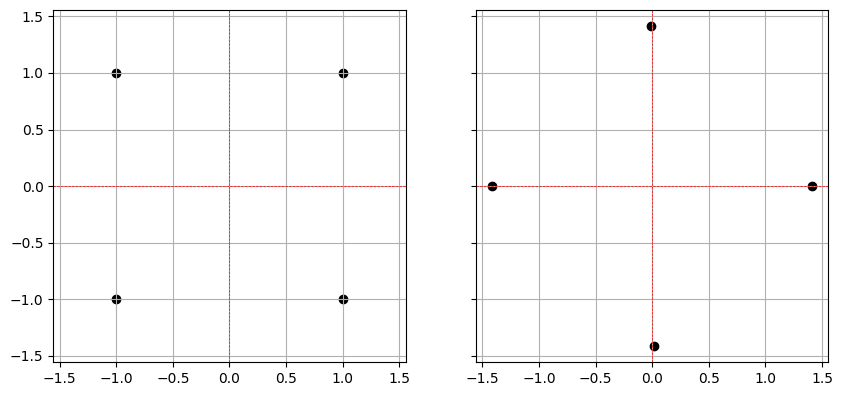

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 8), sharex=True, sharey=True)
ax[0].scatter(X[:, 0], X[:, 1], color='black', label='$X$')
ax[1].scatter(X_new[:, 0], X_new[:, 1], color='black', label='$X_{neq}$')
for i in range(2):
    ax[i].axhline(0, color='red', linestyle='--', linewidth=0.5)
    ax[i].axvline(0, color='red', linestyle='--', linewidth=0.5)
    ax[i].set_aspect('equal')
    ax[i].grid(True)
plt.show()

# **Isometric Mapping (ISOMAP)**

An **Isometric Mapping (ISOMAP)** is a **mapping that preserves distances**. It was introduced by [Tenenbaum et al. (2000)](https://www.science.org/doi/abs/10.1126/science.290.5500.2319).

If one could fit a low $k$-dimensional manifold to the data or come very close to it, the ISOMAP algorithm's basic philosophy is to assume that *learning*
this manifold could help data analysis and that the **distances between the points** are the ***intrinsic* geodesic distances between the points on the manifold**.

While this seems reasonable and intuitive, there are at least three problematic issues that must
be considered:

- What is given is a sample of points and not the approximating manifold *equations*. How are such **geodesic distances** to be computed?

- Even if such distances could be computed, **can the dimension be reduced** while preserving the distances?

- Even if these two issues are addressed, how is an **actual Dimensionality Reduction mapping** to a lower dimensional space to be done?

To address the second issue first, at least at a somewhat intuitive level, i.e., without working through any mathematical definitions, a deep theorem of [Nash (1954)](https://www.jstor.org/stable/pdf/1969840.pdf?refreqid=excelsior%3Ab52c3c5eb6a068e3a7ee1c956b8ab658&ref=cantorsparadise.org&casa_token=5z-LnvvWmNMAAAAA:JONE3N6T5aOIro-4wItq3ka9zScOKNY3WAD46rLdtSpTcmF5E-1m4HQPuaQDg2s0PXP-4RljMhmkvn9zeA7K70d0Bowc2wrGZLnxTJzzWV1_3eHlizTOtw) shows that:

> Any **Riemannian manifold** of dimension $k$ (initially lying in some higher- dimensional space $\mathbb{R}^d$, possibly with $d>>k$) can be **embedded isometrically** into Euclidean space of dimension $2k + 1$.

----

**[Note 1:** Formally, a **Riemannian metric** on a smooth manifold is a choice of inner product for each tangent space of the manifold. A **Riemannian manifold** is a smooth manifold together with a Riemannian metric.]

**[Note 2** Let $(M,g)$ and  $(N,h)$ be Riemannian manifolds. An **isometric embedding** is a smooth embedding $f:M\rightarrow N$ that preserves the metric in the sense that $g$ is equal to the [pullback](https://en.wikipedia.org/wiki/Pullback) of $h$ by $f$, i.e. $g=f*h$

-----



Thus, at least in principle, one can rest assured that such a dimensionality
reduction is possible.

Now, the first issue mentioned above looks like a difficult question. In particular, even if the manifold is *known* analytically (e.g., by as some algebraic equations defining a surface), **computing geodesic distances** requires integrals and higher-dimensional Calculus.

Being given just **a sample of points**, how
can such **distances** be computed? Well, taking a practical approach and recalling
that a manifold looks **locally flat**, then the distances between nearby points can be simply computed using the distance formula for the Euclidean space.

For farther-off points, the usual definition of a **geodesic**, that of a **shortest path on the manifold** between the points, can be used.



In the absence of the manifold itself, such **shortest path** will be defined on an appropriate **neighborhood weighted graph** with the given data points as vertices.

The **neighbors** of a vertex are vertices lying *close enough* so that the distance between them can be defined as the Euclidean lengths of the edges (as weights).

A **shortest path algorithm** is then used to compute the distance between two arbitrary vertices of the graph.

> The **neighborhood graphs** are usually
defined by selecting a small integer $\epsilon > 0$ and **$\epsilon$ nearest neighbors** of a data point as the neighborhood of the point.

> Alternatively, one could use **all neighbors** within a distance $\epsilon$ of a given data point.

One obtains the so-called **$\epsilon$-neighborhood graph** $G_{\epsilon}$.

With this parameter in
place, **ISOMAP** proceeds as follows. It:

**1.** Weighs each edge $(u, v)$ with its distance  $||u - v||$  in $\mathbb{R}^d$.

**2** Computes **shortest path distances** between every pair of vertices using any all pair shortest path algorithm, e.g., [Floyd-Warshall](https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm).

**3.** Returns the resulting $n\times n$ **distance matrix** $D$.

**4.** Returns an appropriate value of the reduced dimension $t$ using **MDS** on the distance matrix $D$.

ISOMAP has a **worst-case run-time** of $O(n^3)$.

Using the **$\epsilon$-NN graph** with $\epsilon$-neighbors, one can also use Dijkstra's algorithm with [**Fibonacci heaps**](https://en.wikipedia.org/wiki/Fibonacci_heap) to reduce it to $O(\epsilon n^2 log n)$ time. There are even faster approaches exploiting the sparse
structure of the neighborhood graph. The algorithm answers the third
issue raised above.

It has been shown theoretically that if the data indeed **lies on a low-dimensional
manifold** whose geometry is that of a **convex region** of space and if the data points are *sufficiently dense* on this manifold, then **ISOMAP returns a distance matrix** that is close to the **actual geodesic distances** and, in the limiting case, converges to it.

How dense the points should be for this to happen depends on some geometric parameters of the manifold. Even though the parameters are not known to the
algorithm, this is an important theoretical result since it assures us that the method is *faithful* to the geodesic distances, i.e., **sufficiently dense data** would lead to the **correct distance computation**.

One problem with **MDS**, and hence **ISOMAP**, is that they are extremely slow in practice because the optimization is **expensive**, and so are the distance computations.

## **Referencias**

- Garzon, M., **et. al** (2022) **Dimensionality Reduction in Data Science**. Springer. Cap. 5 "Gemetric Approaches".